<a href="https://colab.research.google.com/github/rishi-29-02/Book-Price-Prediction/blob/main/Book_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [247]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

In [248]:
#from google.colab import files
#uploaded = files.upload()

In [249]:
train_data = pd.read_excel('Data_Train.xlsx')
test_data = pd.read_excel('Data_Test.xlsx')
train_data.head(20)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00


In [250]:
test_data.shape

(1560, 8)

In [251]:
train_data.shape

(6237, 9)

In [252]:
test_data.shape

(1560, 8)

In [253]:
train_data.describe(include='all')

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [254]:
test_data.describe(include='all')

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,The Five Greatest Warriors (Jack West Series),Agatha Christie,"Paperback,– 2016",5.0 out of 5 stars,1 customer review,A Guardian Pick for 2019\nThe People vs. Putin...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


Therfore there is no missing values.

In [255]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


Data Cleaning

In [256]:
train_data['Ratings'] = train_data['Ratings'].str[0].astype('float64')
train_data['Reviews'] = train_data['Reviews'].str[0].astype('float64')

test_data['Ratings'] = test_data['Ratings'].str[0].astype('float64')
test_data['Reviews'] = test_data['Reviews'].str[0].astype('float64')

train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.0,1.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.0,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.0,1.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [257]:
test_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.0,9.0,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0,1.0,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0,4.0,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.0,1.0,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.0,9.0,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [258]:
train_data.drop(columns=['Title', 'Author', 'Synopsis', 'Genre'], inplace=True)
test_data.drop(columns=['Title', 'Author', 'Synopsis', 'Genre'], inplace=True)
train_data.head()

,Edition,Reviews,Ratings,BookCategory,Price
0,"Paperback,– 10 Mar 2016",4.0,8.0,Action & Adventure,220.00
1,"Paperback,– 7 Nov 2012",3.0,1.0,"Biographies, Diaries & True Accounts",202.93
2,"Paperback,– 25 Feb 1982",4.0,6.0,Humour,299.00
3,"Paperback,– 5 Oct 2017",4.0,1.0,"Crime, Thriller & Mystery",180.00
4,"Hardcover,– 10 Oct 2006",5.0,1.0,"Arts, Film & Photography",965.62


In [259]:
test_data.head()

,Edition,Reviews,Ratings,BookCategory
0,"Mass Market Paperback,– 1 Oct 1986",4.0,9.0,"Crime, Thriller & Mystery"
1,"Paperback,– Import, 26 Apr 2018",5.0,1.0,"Computing, Internet & Digital Media"
2,"Paperback,– 17 Mar 2011",5.0,4.0,Romance
3,"Paperback,– 2016",4.0,1.0,"Computing, Internet & Digital Media"
4,"Paperback,– 26 Dec 2011",4.0,9.0,"Language, Linguistics & Writing"


In [260]:
train_data['Edition type'] = train_data['Edition'].str.split('–').str[0].str.replace(',', '')
train_data['Edition year'] = train_data['Edition'].str.split(' ').str[-1]

test_data['Edition type'] = test_data['Edition'].str.split('–').str[0].str.replace(',', '')
test_data['Edition year'] = test_data['Edition'].str.split(' ').str[-1]

train_data.head()

,Edition,Reviews,Ratings,BookCategory,Price,Edition type,Edition year
0,"Paperback,– 10 Mar 2016",4.0,8.0,Action & Adventure,220.00,Paperback,2016
1,"Paperback,– 7 Nov 2012",3.0,1.0,"Biographies, Diaries & True Accounts",202.93,Paperback,2012
2,"Paperback,– 25 Feb 1982",4.0,6.0,Humour,299.00,Paperback,1982
3,"Paperback,– 5 Oct 2017",4.0,1.0,"Crime, Thriller & Mystery",180.00,Paperback,2017
4,"Hardcover,– 10 Oct 2006",5.0,1.0,"Arts, Film & Photography",965.62,Hardcover,2006


In [261]:
test_data.head()

,Edition,Reviews,Ratings,BookCategory,Edition type,Edition year
0,"Mass Market Paperback,– 1 Oct 1986",4.0,9.0,"Crime, Thriller & Mystery",Mass Market Paperback,1986
1,"Paperback,– Import, 26 Apr 2018",5.0,1.0,"Computing, Internet & Digital Media",Paperback,2018
2,"Paperback,– 17 Mar 2011",5.0,4.0,Romance,Paperback,2011
3,"Paperback,– 2016",4.0,1.0,"Computing, Internet & Digital Media",Paperback,2016
4,"Paperback,– 26 Dec 2011",4.0,9.0,"Language, Linguistics & Writing",Paperback,2011


In [262]:
train_data['Edition type'].value_counts()

Paperback                5193
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
(German)Paperback           1
(Kannada)Paperback          1
(Spanish)Paperback          1
Library Binding             1
Board book                  1
(French)Paperback           1
Perfect Paperback           1
Plastic Comb                1
Leather Bound               1
Product Bundle              1
Name: Edition type, dtype: int64

In [263]:
train_data.drop('Edition', axis=1, inplace=True)
test_data.drop('Edition', axis=1, inplace=True)
train_data.head()

,Reviews,Ratings,BookCategory,Price,Edition type,Edition year
0,4.0,8.0,Action & Adventure,220.00,Paperback,2016
1,3.0,1.0,"Biographies, Diaries & True Accounts",202.93,Paperback,2012
2,4.0,6.0,Humour,299.00,Paperback,1982
3,4.0,1.0,"Crime, Thriller & Mystery",180.00,Paperback,2017
4,5.0,1.0,"Arts, Film & Photography",965.62,Hardcover,2006


In [264]:
train_data['BookCategory'].value_counts()

Action & Adventure                      818
Crime, Thriller & Mystery               723
Biographies, Diaries & True Accounts    596
Language, Linguistics & Writing         594
Comics & Mangas                         583
Romance                                 560
Humour                                  540
Arts, Film & Photography                517
Computing, Internet & Digital Media     510
Sports                                  471
Politics                                325
Name: BookCategory, dtype: int64

In [265]:
train_data.dtypes

Reviews         float64
Ratings         float64
BookCategory     object
Price           float64
Edition type     object
Edition year     object
dtype: object

[]

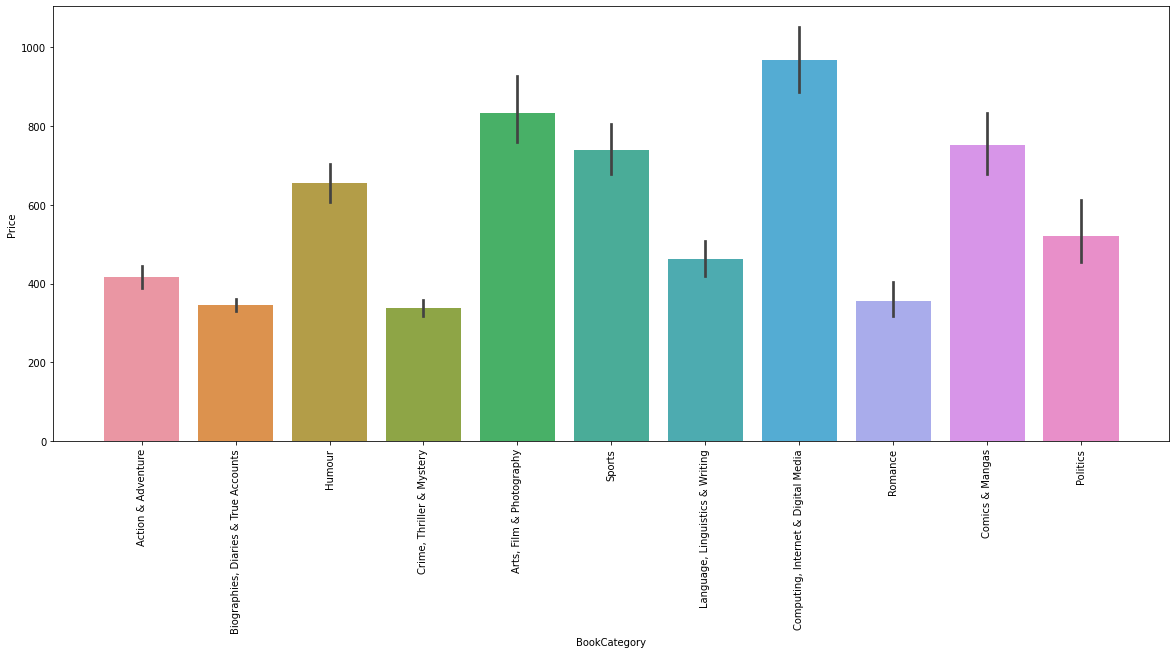

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))
sns.barplot(x=train_data['BookCategory'], y=train_data['Price'])
plt.xticks(rotation=90)
plt.plot()

[]

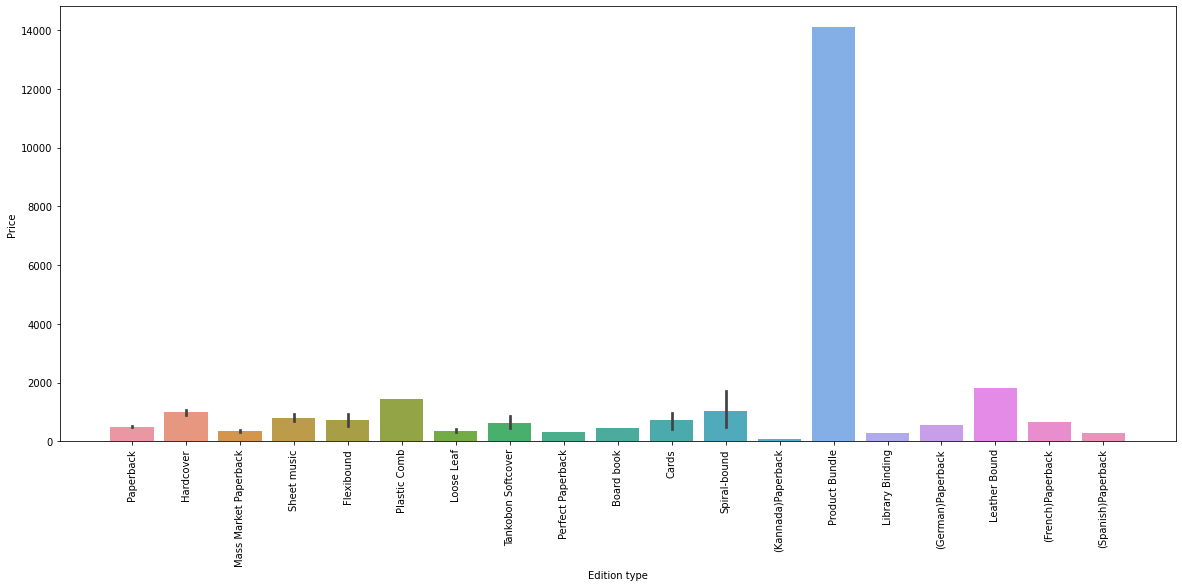

In [267]:
plt.figure(figsize=(20, 8))
sns.barplot(x=train_data['Edition type'], y=train_data['Price'])
plt.xticks(rotation=90)
plt.plot()

In [268]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Reviews       6237 non-null   float64
 1   Ratings       6237 non-null   float64
 2   BookCategory  6237 non-null   object 
 3   Price         6237 non-null   float64
 4   Edition type  6237 non-null   object 
 5   Edition year  6237 non-null   object 
dtypes: float64(3), object(3)
memory usage: 292.5+ KB


Priinting the rows which does not contain digits in the edition year feature.

In [269]:
pd.set_option('display.max_rows', 50)
x = train_data[train_data['Edition year'].apply(lambda x: str(x).isalpha())]
x

,Reviews,Ratings,BookCategory,Price,Edition type,Edition year
169,5.0,2.0,Action & Adventure,418.0,Paperback,Import
235,3.0,6.0,"Arts, Film & Photography",1453.0,Plastic Comb,NTSC
582,4.0,7.0,"Arts, Film & Photography",415.0,Paperback,Import
972,3.0,1.0,Comics & Mangas,445.0,Paperback,Import
1233,5.0,1.0,Action & Adventure,277.0,Paperback,Import
1558,5.0,1.0,"Crime, Thriller & Mystery",100.0,Hardcover,Facsimile
1605,4.0,2.0,"Language, Linguistics & Writing",399.0,Paperback,set
1631,4.0,1.0,Sports,709.0,Paperback,Import
1643,3.0,5.0,"Arts, Film & Photography",220.0,Paperback,Edition
1769,5.0,1.0,"Computing, Internet & Digital Media",2248.0,Hardcover,set


In [270]:
pd.set_option('display.max_rows', 50)
x1 = test_data[test_data['Edition year'].apply(lambda x: str(x).isalpha())]
x1

,Reviews,Ratings,BookCategory,Edition type,Edition year
97,3.0,1.0,Romance,Paperback,Print
178,4.0,1.0,Comics & Mangas,Paperback,Illustrated
396,5.0,2.0,Politics,Paperback,Print
579,3.0,1.0,Politics,Hardcover,Import
955,4.0,1.0,Sports,Paperback,Print
1179,4.0,3.0,Comics & Mangas,Hardcover,set
1191,5.0,1.0,Comics & Mangas,Paperback,Import
1408,5.0,3.0,Humour,Paperback,set
1541,3.0,1.0,"Computing, Internet & Digital Media",Paperback,Import


We cannt drop those instances as we need the output od the same shape.

Thefore filling a random values in those instances. 

In [271]:
train_data = train_data[train_data['Edition year'].apply(lambda x: str(x).isdigit())]

New train data shape

In [272]:
train_data.shape

(6216, 6)

In [273]:
train_data['Edition year'] = train_data['Edition year'].astype('int64')


In [274]:
test_data.dtypes

Reviews         float64
Ratings         float64
BookCategory     object
Edition type     object
Edition year     object
dtype: object

In [275]:
dummy_test_data = test_data
dummy_test_data = dummy_test_data[dummy_test_data['Edition year'].apply(lambda x: str(x).isdigit())]

In [276]:
Max = dummy_test_data['Edition year'].max()
Min = dummy_test_data['Edition year'].min()

In [277]:
import random 
test_data['Edition year'] = test_data['Edition year'].apply(
    lambda x: str(x) if str(x).isdigit() else random.randint(int(Min), int(Max)))
test_data['Edition year'] = test_data['Edition year'].astype('int64')

In [278]:
train_data['Edition year'].corr(train_data.Price)

-0.0248136947601535

In [279]:
train_data.corr()

,Reviews,Ratings,Price,Edition year
Reviews,1.000000,-0.127613,0.134032,0.006040
Ratings,-0.127613,1.000000,-0.061427,0.020141
Price,0.134032,-0.061427,1.000000,-0.024814
Edition year,0.006040,0.020141,-0.024814,1.000000


In [280]:
train_data.head()
train_data = train_data[['Reviews',	'Ratings',	'BookCategory',	'Edition type',	'Edition year', 'Price']]
train_data.head(10)

,Reviews,Ratings,BookCategory,Edition type,Edition year,Price
0,4.0,8.0,Action & Adventure,Paperback,2016,220.00
1,3.0,1.0,"Biographies, Diaries & True Accounts",Paperback,2012,202.93
2,4.0,6.0,Humour,Paperback,1982,299.00
3,4.0,1.0,"Crime, Thriller & Mystery",Paperback,2017,180.00
4,5.0,1.0,"Arts, Film & Photography",Hardcover,2006,965.62
5,4.0,8.0,Sports,Paperback,2009,900.00
6,4.0,7.0,"Crime, Thriller & Mystery",Paperback,2017,224.00
7,4.0,1.0,Sports,Hardcover,2018,836.00
8,4.0,1.0,"Biographies, Diaries & True Accounts",Paperback,2015,130.00
9,4.0,1.0,Action & Adventure,Paperback,2013,695.00


In [281]:
# checking if the label encoding can be done
set(train_data['BookCategory'])==set(test_data['BookCategory'])

True

In [282]:
set(train_data['Edition type'])==set(test_data['Edition type'])

False

In [283]:
train_data['Edition type'].value_counts()

Paperback                5178
Hardcover                 818
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
(German)Paperback           1
(Kannada)Paperback          1
(Spanish)Paperback          1
Library Binding             1
Board book                  1
(French)Paperback           1
Perfect Paperback           1
Leather Bound               1
Product Bundle              1
Name: Edition type, dtype: int64

In [284]:
test_data['Edition type'].value_counts()

Paperback                1265
Hardcover                 233
Mass Market Paperback      45
Sheet music                 8
Flexibound                  4
Spiral-bound                2
Cards                       1
Loose Leaf                  1
(Chinese)Paperback          1
Name: Edition type, dtype: int64

In [285]:
train_data['Edition type'] = train_data['Edition type'].replace(['Tankobon Softcover',
                                                                 'Loose Leaf',
                                                                 'Board book',
                                                                 'Leather Bound',
                                                                 'Product Bundle',
                                                                 'Library Binding'], 'Rare')
train_data['Edition type'] = train_data['Edition type'].replace(['Perfect Paperback',
                                                                 '(German)Paperback',
                                                                 '(Kannada)Paperback',
                                                                 '(French)Paperback',
                                                                 '(Spanish)Paperback'], 'Paperback')
train_data['Edition type'].value_counts()

Paperback                5183
Hardcover                 818
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Rare                        9
Cards                       8
Spiral-bound                4
Name: Edition type, dtype: int64

In [286]:
test_data['Edition type'] = test_data['Edition type'].replace(['Loose Leaf'], 'Rare')
test_data['Edition type'] = test_data['Edition type'].replace(['(Chinese)Paperback'], 'Paperback')
test_data['Edition type'].value_counts()

Paperback                1266
Hardcover                 233
Mass Market Paperback      45
Sheet music                 8
Flexibound                  4
Spiral-bound                2
Rare                        1
Cards                       1
Name: Edition type, dtype: int64

In [287]:
set(train_data['Edition type'])==set(test_data['Edition type'])

True

Thus the label encoding of both the object features can be done. 

In [288]:
print(train_data.dtypes)

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
train_data['BookCategory'] = labelencoder.fit_transform(train_data['BookCategory'])
test_data['BookCategory'] = labelencoder.transform(test_data['BookCategory'])

train_data['Edition type'] = labelencoder.fit_transform(train_data['Edition type'])
test_data['Edition type'] = labelencoder.transform(test_data['Edition type'])

print(train_data.head())

Reviews         float64
Ratings         float64
BookCategory     object
Edition type     object
Edition year      int64
Price           float64
dtype: object
   Reviews  Ratings  BookCategory  Edition type  Edition year   Price
0      4.0      8.0             0             4          2016  220.00
1      3.0      1.0             2             4          2012  202.93
2      4.0      6.0             6             4          1982  299.00
3      4.0      1.0             5             4          2017  180.00
4      5.0      1.0             1             2          2006  965.62


In [289]:
train_data.corr()

,Reviews,Ratings,BookCategory,Edition type,Edition year,Price
Reviews,1.000000,-0.127613,-0.016219,-0.054738,0.006040,0.134032
Ratings,-0.127613,1.000000,-0.014986,0.025292,0.020141,-0.061427
BookCategory,-0.016219,-0.014986,1.000000,0.004102,0.026344,-0.012009
Edition type,-0.054738,0.025292,0.004102,1.000000,-0.070639,-0.203808
Edition year,0.006040,0.020141,0.026344,-0.070639,1.000000,-0.024814
Price,0.134032,-0.061427,-0.012009,-0.203808,-0.024814,1.000000


In [290]:
train_data.shape

(6216, 6)

In [291]:
train_data.head()

,Reviews,Ratings,BookCategory,Edition type,Edition year,Price
0,4.0,8.0,0,4,2016,220.00
1,3.0,1.0,2,4,2012,202.93
2,4.0,6.0,6,4,1982,299.00
3,4.0,1.0,5,4,2017,180.00
4,5.0,1.0,1,2,2006,965.62


In [292]:
from sklearn.model_selection import train_test_split

array = train_data.values
X = array[:, 0:5]
Y = array[:, 5]

#X = train_data.drop('Price', axis=1)
#Y = train_data['Price'].values
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.33, random_state=1)

In [293]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RFR', RandomForestRegressor()))

# evaluate each model in turn
results = []
names = []
scoring = 'r2'
for name, model in models:
  kfold = KFold(n_splits=7)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = ("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
  print(msg)

LR: 0.047927 (0.035735)
LASSO: 0.048040 (0.035273)
EN: 0.040481 (0.019808)
KNN: 0.001068 (0.076626)
RFR: -0.188996 (0.226525)


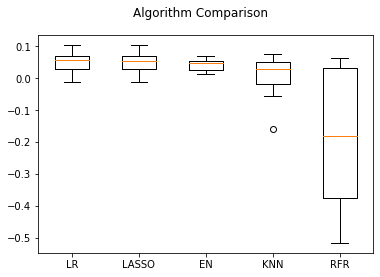

In [294]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [295]:
# Final model
model = Lasso()
model.fit(x_train, y_train)

Lasso()

Predictions on the test data

In [296]:
test_data.head()

,Reviews,Ratings,BookCategory,Edition type,Edition year
0,4.0,9.0,5,3,1986
1,5.0,1.0,4,4,2018
2,5.0,4.0,9,4,2011
3,4.0,1.0,4,4,2016
4,4.0,9.0,7,4,2011


In [297]:
predictions = model.predict(test_data)

In [298]:
np.set_printoptions(precision=2)
df = pd.DataFrame({'Price':predictions})

In [299]:
df.to_csv('Predictions.csv', index=False)

In [300]:
p = pd.read_csv('Predictions.csv')
p

,Price
0,730.691096
1,604.264160
2,573.883515
3,522.061087
4,433.779260
...,...
1555,597.881276
1556,453.617764
1557,485.922010
1558,446.588744
